<a href="https://colab.research.google.com/github/RPW-11/Data-Preprocessing-and-Simple-EDA/blob/main/Data_Preprocessing_and_Simple_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Simple EDA
*created by: Ida Bagus Kade Rainata Putra Wibawa*

In this notebook, I will try to perform data processing and simple exploratory data analysis.

The dataset that I will use is from [TMDB 15000 Movies Dataset (with credits)](https://www.kaggle.com/datasets/prabhakarz/tmdb-15000-movies-dataset-with-credits).

<b>*Note: I use kaggle API to automatically download the dataset. You will need to upload your account token to be able to use the API* </b>

In [ ]:
# setting up to use kaggle API
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           8593        314  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36           1234         37  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3853         91  1.0              
omartorres25/honda-data   

In [ ]:
!kaggle datasets download -d prabhakarz/tmdb-15000-movies-dataset-with-credits

 92% 52.0M/56.5M [00:02<00:00, 25.8MB/s]
100% 56.5M/56.5M [00:02<00:00, 21.2MB/s]


In [ ]:
!unzip /content/tmdb-15000-movies-dataset-with-credits.zip

Archive:  /content/tmdb-15000-movies-dataset-with-credits.zip
  inflating: movie_data.csv          


In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
size = os.path.getsize('movie_data.csv')
print(f"The size of this data set is {size/(10**6):.2f} mb")

The size of this data set is 305.80 mb


In [ ]:
df = pd.read_csv('movie_data.csv', lineterminator='\n')
df.head()

,Unnamed: 0,adult,backdrop_path,movie_id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew
0,0,False,/kQM7o3NIkruIZLoQ9E2XzZQ8Ujl.jpg,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,/onGdT8sYi89drvSJyEJnft97rOq.jpg,2022-02-04,Looop Lapeta,False,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn..."
1,1,False,/7w06baRS9VPm5RYz8lawTCLiR4j.jpg,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,/8p3mhjyLjHKtaAv8tFKfvEBtir0.jpg,2021-11-05,Sooryavanshi,False,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k..."
2,2,False,/sP9mRWiCxCuy17tUJfV8TpSZpqc.jpg,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,/m1b9toKYyCujHuLoXB5GSDunO9e.jpg,2023-01-25,Pathaan,False,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k..."
3,3,False,/vBmmJYv5asJpdJZsyPPc4MMpfBe.jpg,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,/1MIDERaEUMw1rYDM99tGZPY80Ap.jpg,2023-03-24,Chor Nikal Ke Bhaga,False,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '..."
4,4,False,/u7kuUaySqXBVAtqEl9vkTkAzHV9.jpg,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,/66A9MqXOyVFCssoloscw79z8Tew.jpg,2009-12-25,3 Idiots,False,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k..."


Immediately, we know that the first column which is **Unnamed: 0** is overlapping with the index. We will delete this column

In [ ]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

Let's get the general information of this dataset. We'll use `dataframe.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15871 entries, 0 to 15870
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              15871 non-null  bool   
 1   backdrop_path      13020 non-null  object 
 2   movie_id           15871 non-null  int64  
 3   original_language  15871 non-null  object 
 4   original_title     15871 non-null  object 
 5   overview           15655 non-null  object 
 6   popularity         15871 non-null  float64
 7   poster_path        15219 non-null  object 
 8   release_date       15871 non-null  object 
 9   title              15871 non-null  object 
 10  video              15871 non-null  bool   
 11  vote_average       15871 non-null  float64
 12  vote_count         15871 non-null  int64  
 13  genres             15871 non-null  object 
 14  keywords           15871 non-null  object 
 15  cast               15871 non-null  object 
 16  crew               158

As we can see, some columns have null values that we need to handle.
Next, we will look at the shape of the dataset. We can use the `.shape` property from the dataframe.

In [ ]:
print(f"The shape of this data set is {df.shape}")

The shape of this data set is (15871, 17)


## Handling Missing Values
We saw that the dataset has a bunch of missing values. We need to examine those missing values before doing some training for machine learning models.
The first step that we can do is to count the percentage of missing values on each column.

In [ ]:
missing_percentage = pd.DataFrame({'amount': df.isnull().sum(), 'percentage': (df.isnull().sum()/df.shape[0]*100).round(2)})
missing_percentage = missing_percentage[missing_percentage['amount'] > 0]
missing_percentage

,amount,percentage
backdrop_path,2851,17.96
overview,216,1.36
poster_path,652,4.11


Okay, let's try to understand the columns first.


1.   **backdrop_path** is basically a file path of the movie's backdrop picture.
2.   **overview** is the movie's synopsis.
3. **poster_path** is also a file path of the movie's poster.

The **path** column type might not be necessary for the analysis since it's just "a path of the image", so we'll just drop it.

For **overview** column, it would be impractical to fill all the missing values with the appropriate synopsis. We're just going to fill the missing values with "**Not given**"


In [ ]:
cols = ['backdrop_path','poster_path']
df.drop(labels=cols, axis=1, inplace=True)

In [ ]:
# print the columns
print(f"These are the new exisiting columns {list(df.columns)}")

These are the new exisiting columns ['adult', 'movie_id', 'original_language', 'original_title', 'overview', 'popularity', 'release_date', 'title', 'video', 'vote_average', 'vote_count', 'genres', 'keywords', 'cast', 'crew']


In [ ]:
# fill the null values on the column "overview" with "Not given"
indexes = df[df['overview'].isnull()]['overview'].index
df.loc[indexes,['overview']] = 'Not given'

In [ ]:
df[df['overview'] == 'Not given']['overview']

191      Not given
731      Not given
1043     Not given
1066     Not given
1230     Not given
           ...    
5800     Not given
5816     Not given
5819     Not given
15102    Not given
15848    Not given
Name: overview, Length: 216, dtype: object

Let's make sure that no column contains null values. We can use `df.isnull().sum()`

In [ ]:
df.isnull().sum()

adult                0
movie_id             0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
title                0
video                0
vote_average         0
vote_count           0
genres               0
keywords             0
cast                 0
crew                 0
dtype: int64

## Working with date data type

You might've noticed that the **release_date** column is in the format of `object`. We need to convert it to **timestamp** type to make it easier to work on. We'll use `pd.to_datetime`

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.dtypes

adult                          bool
movie_id                      int64
original_language            object
original_title               object
overview                     object
popularity                  float64
release_date         datetime64[ns]
title                        object
video                          bool
vote_average                float64
vote_count                    int64
genres                       object
keywords                     object
cast                         object
crew                         object
dtype: object

Now, let's extract the day, month, and year from **release_date** column.  We can use date properties (`df.dt`)

In [ ]:
# extract year
df['year'] = df['release_date'].dt.year
# extract month name
df['month'] = df['release_date'].dt.month_name()
# extract day name 
df['day'] = df['release_date'].dt.day_name()
df.head()

,adult,movie_id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew,year,month,day
0,False,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,2022-02-04,Looop Lapeta,False,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn...",2022,February,Friday
1,False,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,2021-11-05,Sooryavanshi,False,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...",2021,November,Friday
2,False,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,2023-01-25,Pathaan,False,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k...",2023,January,Wednesday
3,False,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,2023-03-24,Chor Nikal Ke Bhaga,False,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '...",2023,March,Friday
4,False,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,2009-12-25,3 Idiots,False,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k...",2009,December,Friday


### Getting insights using dates
Let's try to answer these questions:


`1.   What are the released years that have the highest number of movies (mention 10)?`

`2.   What are the released months that have the highest number of movies?`

`3. What are the released days that have the highest number of movies?`



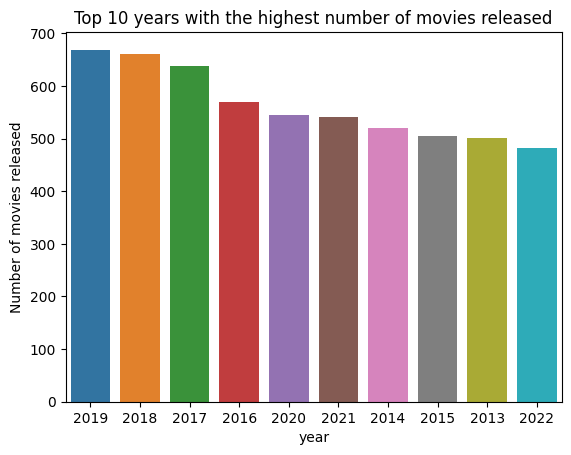

In [ ]:
# year
top_10_years = df.groupby('year')['year'].count().sort_values(ascending=False).head(10).reset_index(name='count')
sns.barplot(x='year', y='count', data=top_10_years, order = top_10_years['year'])
plt.title('Top 10 years with the highest number of movies released')
plt.ylabel('Number of movies released')

plt.show()

2019 is the year when a lot of movies were released. Also, the number drops in the next years. I guess this is due to Covid 19 pandemic

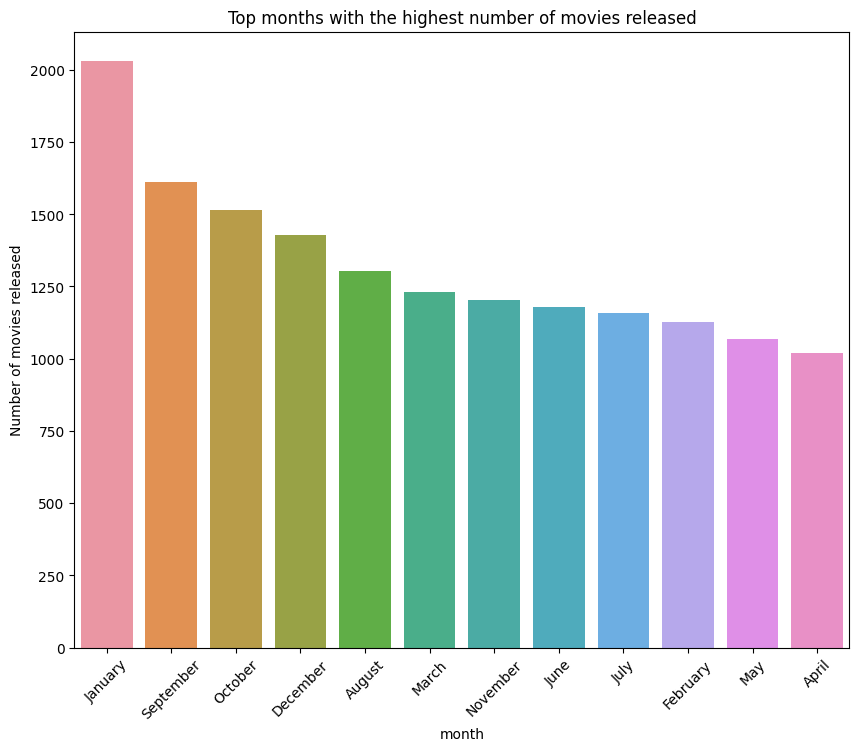

In [ ]:
# months
top_months = df.groupby('month')['month'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='month', y='count', data=top_months, order = top_months['month'])
plt.title('Top months with the highest number of movies released')
plt.ylabel('Number of movies released')
plt.xticks(rotation=45)

plt.show()

January win this! Perhaps the beginning of new year is the right time to release a movie

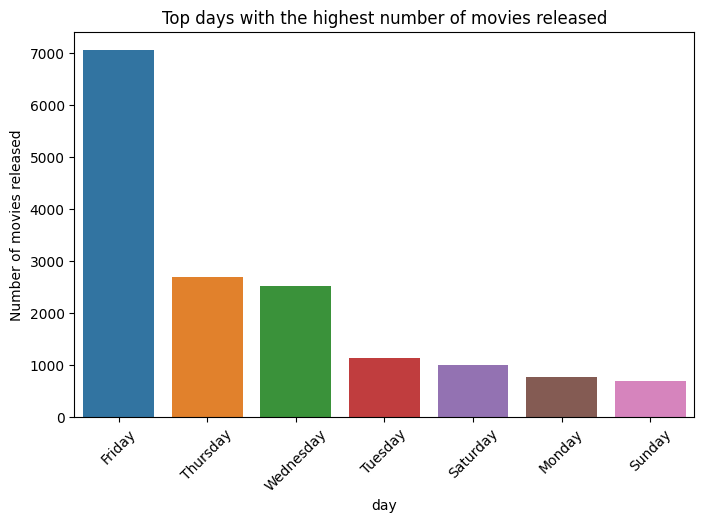

In [ ]:
# day
top_days = df.groupby('day')['day'].count().reset_index(name='count').sort_values(by='count', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='day', y='count', data=top_days, order = top_days['day'])
plt.title('Top days with the highest number of movies released')
plt.ylabel('Number of movies released')
plt.xticks(rotation=45)

plt.show()

Okay, Friday win with a significant amount. 

I wonder if this is because Friday is the end of the weekday. The movies should be available before the weekend (Saturday and Sunday), so releasing them on Friday is probably the right time.

## Check if there's any duplicates in our dataset
To do this, you can use `df.duplicated()` and then `sum()` to count the number of duplicated values

In [ ]:
duplicates = df.duplicated().sum()
print(f"The number of duplicated values is {duplicates}")

The number of duplicated values is 0


## Invalid format
If you look at the genres column. The values are written in a strange format. They're almost like a JSON type format and stored inside a `list`

We'll try to change its format by changing it into **each genre** of a movie. There are plenty ways of doing this, but we will use `regex` to make it easier

In [ ]:
# overview of the genre column
val = df[['genres']].head().iloc[0, 0] # the second '0' is used to display the whole string value
print(f"This is an example of genres of one of the movies\n{val}")

This is an example of genres of one of the movies
[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 80, 'name': 'Crime'}]


In [ ]:
# import regex 
import re
pattern = r"'name': '([\w ]*)'"

Now that we already have the pattern for finding the genres only, the next step will be applying it to the dataframe.

We will use `re.findall()` to find all of the genres and `df.apply()` + `lambda` to replace the values of the column.

In [ ]:
df['genres'] = df['genres'].apply(lambda x: ', '.join(re.findall(pattern, x)))

In [ ]:
print("Here's the new result")
df[['genres']].head()

Here's the new result


,genres
0,"Action, Comedy, Crime"
1,"Action, Crime, Thriller"
2,"Action, Adventure, Thriller"
3,"Crime, Thriller"
4,"Drama, Comedy"


### Getting insights from **genres** column

Let's try to answer this question.

1.   What are the 10 most popular genres?

To do this, we can't simply groupby the dataframe based on **genre**. The reason is because it has multiple genres in a single movie. Groupby-ing it by genre will result a multiple genres class.



In [ ]:
df.groupby('genres')['genres'].count()

genres
                                        1230
Action                                   170
Action, Adventure                         27
Action, Adventure, Animation               3
Action, Adventure, Animation, Comedy       1
                                        ... 
Western, History, War, Drama               1
Western, Horror                            1
Western, Horror, Thriller                  1
Western, Mystery, Thriller, Drama          1
Western, Romance                           1
Name: genres, Length: 2441, dtype: int64

As you can see, it looks weird. What we can do is creating a new data frame and store the occurences for each genre. We need to iterate over the **genres column**

In [ ]:
num_genres = {} # new dictionary
for i in df.index:
  for genre in df['genres'][i].split(','):
    genre = genre.strip() # remove trailing space
    if genre in num_genres:
      num_genres[genre] += 1
    else:
      num_genres[genre] = 1


In [ ]:
num_genre_df = pd.DataFrame(num_genres, index=['Counts']).T
num_genre_df

,Counts
Action,3317
Comedy,4691
Crime,2074
Thriller,3312
Adventure,1708
Drama,7556
Romance,3056
Fantasy,1189
Family,1493
Music,491


Oops. We got a problem here.

There's 1230 movies that registered with 'empty' genre. Let's see some of those movies.

In [ ]:
df[df['genres'] == ''].head()

,adult,movie_id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew,year,month,day
143,False,669583,hi,Did It Happen?,"In A not-so- typical scenario, Ishan a young, ...",10.563,2020-02-02,Did It Happen?,False,6.4,5,,[],"[{'adult': False, 'gender': 0, 'id': 2528817, ...",[],2020,February,Sunday
593,False,658767,hi,Intercourse,A story of a Horny couple that always wants to...,6.244,2019-12-25,Intercourse,False,0.0,0,,[],"[{'adult': False, 'gender': 1, 'id': 2492365, ...","[{'adult': True, 'gender': 2, 'id': 3036485, '...",2019,December,Wednesday
611,False,158780,hi,Run,This action movie is filled with romance and a...,3.826,2004-01-29,Run,False,5.4,12,,[],"[{'adult': False, 'gender': 2, 'id': 35793, 'k...","[{'adult': False, 'gender': 2, 'id': 88596, 'k...",2004,January,Thursday
630,False,357131,hi,विश्वात्मा,Two brave and smart young men: namely Police i...,4.604,1992-01-24,Vishwatma,False,6.4,5,,[],"[{'adult': False, 'gender': 2, 'id': 6497, 'kn...","[{'adult': False, 'gender': 2, 'id': 583607, '...",1992,January,Friday
736,False,143881,hi,Suhaag,Collegian Ajay Sharma was born on 2nd April 19...,3.339,1994-10-20,Suhaag,False,5.6,7,,[],"[{'adult': False, 'gender': 2, 'id': 42803, 'k...","[{'adult': False, 'gender': 2, 'id': 105448, '...",1994,October,Thursday


For this case, we're going to put **'Not given'** for the genre fo movies that are empty. We can use the `df.apply()` function.

In [ ]:
df['genres'] = df['genres'].apply(lambda x: 'Not given' if x == '' else x)

In [ ]:
# storing the genres into dictionary
num_genres = {} # new dictionary
for i in df.index:
  for genre in df['genres'][i].split(','):
    genre = genre.strip() # remove trailing space
    if genre in num_genres:
      num_genres[genre] += 1
    else:
      num_genres[genre] = 1

In [ ]:

num_genre_df = pd.DataFrame(num_genres, index=['count']).T
num_genre_df

,count
Action,3317
Comedy,4691
Crime,2074
Thriller,3312
Adventure,1708
Drama,7556
Romance,3056
Fantasy,1189
Family,1493
Music,491


There you go, a clean dataframe for the genres.

Let's now plot the top 10 most popular genre.

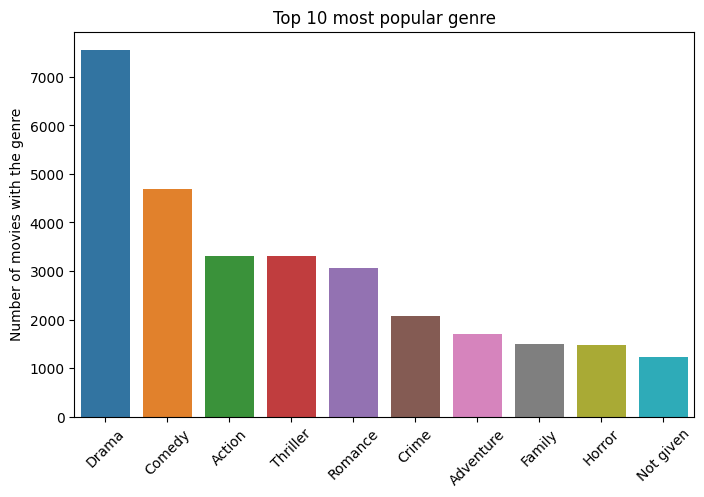

In [ ]:
top_10_genre = num_genre_df.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_genre.index, y='count', data=top_10_genre)
plt.title('Top 10 most popular genre')
plt.ylabel('Number of movies with the genre')
plt.xticks(rotation=45)

plt.show()

You can definitely apply the same technique for the column **cast** and **crew** to get cleaner values.

## The Outliers

There are many ways to find the outliers for numerical variables. Let's first boxplot all of the numerical variables. We can use `sns.boxplot`

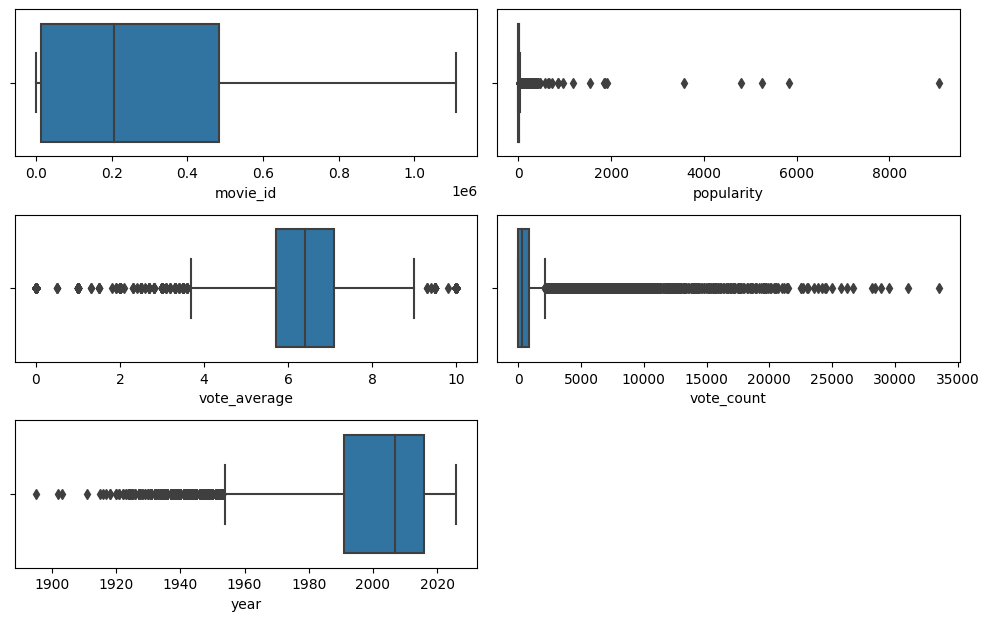

In [ ]:
numeric_cols = df.columns[(df.dtypes == 'int64') | (df.dtypes =='float64')]
plt.figure(figsize=(10,10))
i = 1
for col in numeric_cols:
  plt.subplot(5,2, i)
  i += 1
  sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

Let's inspect **popularity** column first since it might have an outliers in it. We can use `describe` to see the maximum value from values of the column.

In [ ]:
df['popularity'].describe()

count    15871.000000
mean        18.090328
std        114.493915
min          0.600000
25%          1.738500
50%         10.094000
75%         17.209500
max       9065.306000
Name: popularity, dtype: float64

We can see the maximum value, which is **9065**, is really far away from the mean, **18**. I personally don't know how this movie popularity was measured. But, let's try to see the movie that has the highest popularity.

In [ ]:
df.sort_values(by='popularity', ascending=False).head(1)

,adult,movie_id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew,year,month,day
7141,False,502356,en,The Super Mario Bros. Movie,"While working underground to fix a water main,...",9065.306,2023-04-05,The Super Mario Bros. Movie,False,7.5,631,"Animation, Adventure, Family, Fantasy, Comedy","['video game', 'plumber', 'magic mushroom', 'b...","[{'adult': False, 'gender': 2, 'id': 73457, 'k...","[{'adult': False, 'gender': 2, 'id': 5720, 'kn...",2023,April,Wednesday


The movie is **The Super Mario Bros. Movie** and was released on April 2023, which was very recent. 

I think it makes a lot of sense why the movie has such a high popularity. I'm also pretty sure that the movies which release date is before the emergence of technology would have a lower popularity. 

To prove this, let's try to group the data by its year and compute the mean of popularity for each year and plot them.

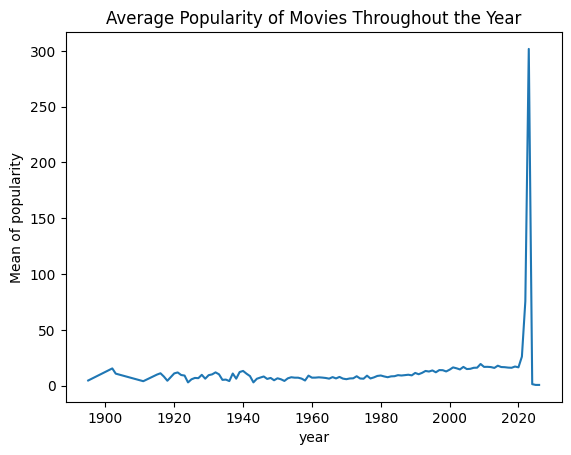

In [ ]:
year_pop_mean = df.groupby('year')['popularity'].mean().reset_index()
sns.lineplot(x='year', y='popularity', data=year_pop_mean)
plt.ylabel('Mean of popularity')
plt.title('Average Popularity of Movies Throughout the Year')

plt.show()

As you can see, starting from 2020, movies popularity rose up massively.

### Identifying Outliers Using 3 Standard Deviation Method or Z-score method

We can identify the outliers by setting 2 threshold values which are the `upper limit` and the `lower limit`. Then, any data that falls above the **upper limit** or under the **lower limit** will be set as outliers.

The upper limit and lower limit are defined as:

`upper limit` = `mean + 3*std`

`lower limit` = `mean - 3*std`

If we were to use `z-score`, the upper limit and lower limit will be defined as:

`upper limit` = `3`

`lower limit` = `-3`

Let's try it out with these 2 methods for the column **popularity**

In [ ]:
# with 3 std
up_lim = df['popularity'].mean() + 3*df['popularity'].std()
low_lim = df['popularity'].mean() - 3*df['popularity'].std()
print(f"The upper limit value is {up_lim}\nThe lower limit value is {low_lim}")

The upper limit value is 361.57207436217044
The lower limit value is -325.39141807082143


In [ ]:
outliers = df[(df['popularity'] > up_lim) | (df['popularity'] < low_lim)]
print(f"There are {outliers.shape[0]} outliers")
#outliers

There are 28 outliers


In [ ]:
# with the z score
zscore_df = pd.DataFrame({'movie_name': df['title'], 'z-score': (df['popularity']- df['popularity'].mean())/df['popularity'].std()})
zscore_df.head()

,movie_name,z-score
0,Looop Lapeta,0.333823
1,Sooryavanshi,0.235704
2,Pathaan,0.257836
3,Chor Nikal Ke Bhaga,0.224454
4,3 Idiots,0.167430


In [ ]:
outliers = zscore_df[(zscore_df['z-score'] > 3) |(zscore_df['z-score'] < -3)]
print(f"There are {outliers.shape[0]} outliers")
#outliers

There are 28 outliers


Both methods result in the same number of outliers because they are actually the same.

### Identifying Outliers Using 1.5 IQR (Inter Quartile Range)
You can also identify outliers by using **Inter Quartile Range (IQR)**. The concept is actually the same as the 3 Standard Deviation, that is by setting the upper limit and lower limit and then filter the data based on those values.
The upper limit and lower limit are formulated as follows:


1.   `upper limit = Q3 + 1.5 * IQR `
2.   `lower limit = Q1 - 1.5 * IQR`

and `IQR` is defined as


1.   `IQR = Q3 - Q1`





In [ ]:
q3, q1 = (df['popularity'].quantile(.75), df['popularity'].quantile(.25))
iqr = q3 - q1
up_lim = q3 + 1.5 * iqr
low_lim = q1 - 1.5 * iqr

In [ ]:
outliers = df[(df['popularity'] > up_lim) | (df['popularity'] < low_lim)]
print(f"There are {outliers.shape[0]} found")
# outliers

There are 1115 found


Each method can give a different value of outliers. But, really the way how we treat outliers is what matters

### Handling Outliers
There are many ways to deal with outliers. I found an article from Medium that might be helpful. Here's the link to it [4 Easy Ways to Handle Outliers in Your Data](https://medium.com/mlearning-ai/4-easy-ways-to-handle-outliers-in-your-data-47f125a3f779).

You also need to see the value found as an outlier is reasonable or not and see if it affects your analysis.

## Cleaning the rest of the data

Let's make the data cleaner. **keywords, cast, and crew** are still in a poor format.

In [ ]:
# inspect keywords col
print(df['keywords'][0], type(df['keywords'][0]))

['remake', 'looop lapeta', 'saade saati'] <class 'str'>


In [ ]:
# let's use regex to exclude the unecessary characters such as square brackets, and single quote
# I came up with this pattern through few tries
patt = r"'([\w ]+)'"
df['keywords'] = df['keywords'].apply(lambda x: ", ".join(re.findall(patt, x)))

In [ ]:
# here's the result
df[['keywords']].head()

,keywords
0,"remake, looop lapeta, saade saati"
1,"police, sequel, police officer, cop universe"
2,"spy, fake death, spy thriller, spy universe, y..."
3,"heist, airplane hijacking"
4,"suicide, suicide attempt, college, musical, sl..."


In [ ]:
# inspect cast col
print(df['cast'][0], type(df['cast'][0]))

[{'adult': False, 'gender': 1, 'id': 550167, 'known_for_department': 'Acting', 'name': 'Taapsee Pannu', 'original_name': 'Taapsee Pannu', 'popularity': 6.156, 'profile_path': '/u9Gwg3J0bdczTPunP8qoWK2Vhu4.jpg', 'cast_id': 1, 'character': 'Savi', 'credit_id': '5ff5b30128723c0040af9605', 'order': 0}, {'adult': False, 'gender': 2, 'id': 1714229, 'known_for_department': 'Acting', 'name': 'Tahir Raj Bhasin', 'original_name': 'Tahir Raj Bhasin', 'popularity': 2.203, 'profile_path': '/A4ylMYWj8IqnmX74Two8c4Lp8jY.jpg', 'cast_id': 3, 'character': 'Satya', 'credit_id': '5ff5b31dd38b580043cb4047', 'order': 1}, {'adult': False, 'gender': 1, 'id': 2092738, 'known_for_department': 'Acting', 'name': 'Shreya Dhanwanthary', 'original_name': 'Shreya Dhanwanthary', 'popularity': 8.802, 'profile_path': '/dSWHYuEWjPzczAzdLFgYHt3Y5Dd.jpg', 'cast_id': 15, 'character': 'Julia', 'credit_id': '6136133e2cde980089dc0082', 'order': 2}, {'adult': False, 'gender': 2, 'id': 101823, 'known_for_department': 'Acting', '

In [ ]:
# let's get only the names of the cast
patt = r"'name': '([\w ]*)'"
df['cast'] = df['cast'].apply(lambda x: ", ".join(re.findall(patt, x)))

In [ ]:
# result
df[['cast']].head()

,cast
0,"Taapsee Pannu, Tahir Raj Bhasin, Shreya Dhanwa..."
1,"Akshay Kumar, Katrina Kaif, Ajay Devgn, Ranvee..."
2,"Shah Rukh Khan, Deepika Padukone, John Abraham..."
3,"Yami Gautam, Sunny Kaushal, Sharad Kelkar, Ind..."
4,"Aamir Khan, Sharman Joshi, Kareena Kapoor Khan..."


In [ ]:
# inspect crew column
print(df['crew'][0], type(df['crew'][0]))

[{'adult': False, 'gender': 2, 'id': 1071, 'known_for_department': 'Directing', 'name': 'Tom Tykwer', 'original_name': 'Tom Tykwer', 'popularity': 4.312, 'profile_path': '/cu7F4AulzRbj0dZH9s5pRM61w64.jpg', 'credit_id': '617796df9ee0ef008c45483e', 'department': 'Writing', 'job': 'Original Story'}, {'adult': False, 'gender': 2, 'id': 1108802, 'known_for_department': 'Production', 'name': 'Mukesh Chhabra', 'original_name': 'Mukesh Chhabra', 'popularity': 2.972, 'profile_path': '/f5XI2wJs2JPcd5FSECsdcnkyOMW.jpg', 'credit_id': '61e09db05bce9e0041751368', 'department': 'Production', 'job': 'Casting Director'}, {'adult': False, 'gender': 0, 'id': 1208683, 'known_for_department': 'Production', 'name': 'Tanuj Garg', 'original_name': 'Tanuj Garg', 'popularity': 0.6, 'profile_path': None, 'credit_id': '5ff5b40d245dbe003d301373', 'department': 'Production', 'job': 'Producer'}, {'adult': False, 'gender': 0, 'id': 1376941, 'known_for_department': 'Production', 'name': 'Siddharth Atha', 'original_nam

In [ ]:
# we'll use the same regex pattern from the column cast since the format for the column crew is the same
df['crew'] = df['crew'].apply(lambda x: ", ".join(re.findall(patt, x)))

In [ ]:
# result
df[['crew']].head()

,crew
0,"Tom Tykwer, Mukesh Chhabra, Tanuj Garg, Siddha..."
1,"Akshay Kumar, Karan Johar, Bunty Nagi, Hiroo J..."
2,"Aditya Chopra, Siddharth Anand, Siddharth Anan..."
3,"Dinesh Vijan, Raj Kumar Gupta, Ajay Singh, Man..."
4,"Boman Irani, Kareena Kapoor Khan, Manish Malho..."


In [ ]:
# make sure there are no empty string value for columns keyword, crew, and cast
empty_val = df[(df['keywords'] == '') | (df['crew'] == '') | (df['cast'] == '')].shape[0]
print(f"There are {empty_val} movies that have an empty value for either of the columns mentioned")

There are 5342 movies that have an empty value for either of the columns mentioned


There are still empty values for these colummn. Let's replace those empty value with 'Not given'. We can do this by looping through each column and use `lambda` function to give a value

In [ ]:
for col in ['keywords', 'crew', 'cast']:
  df[col] = df[col].apply(lambda x: 'Not given' if x == '' else x)

In [ ]:
# check the result
empty_val = df[(df['keywords'] == '') | (df['crew'] == '') | (df['cast'] == '')].shape[0]
print(f"There are {empty_val} movies that have an empty value for either of the columns mentioned")

There are 0 movies that have an empty value for either of the columns mentioned


### Top 10 Most Popular Actor
Their popularity is measured by the number of movies in which the person is a cast.

In [ ]:
cast_dic = {}
for i in range(df.shape[0]):
  for cast in df['cast'][i].split(', '):
    temp = cast.strip()
    if temp in cast_dic:
      cast_dic[temp] += 1
    else:
      cast_dic[temp] = 1

# create the data frame
cast_df = pd.DataFrame(cast_dic, index=['count'])

In [ ]:
# transpose the cast data frame
cast_df = cast_df.T
cast_df.head()

,count
Taapsee Pannu,25
Tahir Raj Bhasin,9
Shreya Dhanwanthary,3
Dibyendu Bhattacharya,15
Rajendra Chawla,7


In [ ]:
# check the number of cast
print(f"The number of cast found is {cast_df.shape[0]}")

The number of cast found is 164276


In [ ]:
# top 10 actor
cast_df.sort_values(by = 'count', ascending=False).head(10)

,count
Not given,545
Shakti Kapoor,307
Anupam Kher,256
Kader Khan,224
Gulshan Grover,223
Asrani,223
Aruna Irani,211
Mithun Chakraborty,207
Prem Chopra,206
Amitabh Bachchan,199


I guess, this is more like Top 9 Most Popular Actor since 'Not given' is not counted. If you wanna find the 10 most popular actor, just change the `.head(10)` to `.head(11)` and exclude the 'Not given' actor.

### Overview Before and After Cleaning

In [ ]:
before_cleaning = pd.read_csv('movie_data.csv', lineterminator='\n')
after_cleaning = df

In [ ]:
# before cleaning
before_cleaning.head()

,Unnamed: 0,adult,backdrop_path,movie_id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew
0,0,False,/kQM7o3NIkruIZLoQ9E2XzZQ8Ujl.jpg,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,/onGdT8sYi89drvSJyEJnft97rOq.jpg,2022-02-04,Looop Lapeta,False,6.2,54,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","['remake', 'looop lapeta', 'saade saati']","[{'adult': False, 'gender': 1, 'id': 550167, '...","[{'adult': False, 'gender': 2, 'id': 1071, 'kn..."
1,1,False,/7w06baRS9VPm5RYz8lawTCLiR4j.jpg,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,/8p3mhjyLjHKtaAv8tFKfvEBtir0.jpg,2021-11-05,Sooryavanshi,False,5.8,133,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","['police', 'sequel', 'police officer', 'cop un...","[{'adult': False, 'gender': 2, 'id': 35070, 'k...","[{'adult': False, 'gender': 2, 'id': 35070, 'k..."
2,2,False,/sP9mRWiCxCuy17tUJfV8TpSZpqc.jpg,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,/m1b9toKYyCujHuLoXB5GSDunO9e.jpg,2023-01-25,Pathaan,False,6.7,70,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","['spy', 'fake death', 'spy thriller', 'spy uni...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 2, 'id': 35771, 'k..."
3,3,False,/vBmmJYv5asJpdJZsyPPc4MMpfBe.jpg,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,/1MIDERaEUMw1rYDM99tGZPY80Ap.jpg,2023-03-24,Chor Nikal Ke Bhaga,False,7.2,55,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...","['heist', 'airplane hijacking']","[{'adult': False, 'gender': 1, 'id': 1115720, ...","[{'adult': False, 'gender': 2, 'id': 102246, '..."
4,4,False,/u7kuUaySqXBVAtqEl9vkTkAzHV9.jpg,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,/66A9MqXOyVFCssoloscw79z8Tew.jpg,2009-12-25,3 Idiots,False,8.0,2052,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","['suicide', 'suicide attempt', 'college', 'mus...","[{'adult': False, 'gender': 2, 'id': 52763, 'k...","[{'adult': False, 'gender': 2, 'id': 35779, 'k..."


In [ ]:
# after cleaning
after_cleaning.head()

,adult,movie_id,original_language,original_title,overview,popularity,release_date,title,video,vote_average,vote_count,genres,keywords,cast,crew,year,month,day
0,False,783461,hi,लूप लपेटा,"When her boyfriend loses a mobster's cash, Sav...",56.311,2022-02-04,Looop Lapeta,False,6.2,54,"Action, Comedy, Crime","remake, looop lapeta, saade saati","Taapsee Pannu, Tahir Raj Bhasin, Shreya Dhanwa...","Tom Tykwer, Mukesh Chhabra, Tanuj Garg, Siddha...",2022,February,Friday
1,False,592508,hi,Sooryavanshi,"A fearless, faithful albeit slightly forgetful...",45.077,2021-11-05,Sooryavanshi,False,5.8,133,"Action, Crime, Thriller","police, sequel, police officer, cop universe","Akshay Kumar, Katrina Kaif, Ajay Devgn, Ranvee...","Akshay Kumar, Karan Johar, Bunty Nagi, Hiroo J...",2021,November,Friday
2,False,864692,hi,पठान,A soldier caught by enemies and presumed dead ...,47.611,2023-01-25,Pathaan,False,6.7,70,"Action, Adventure, Thriller","spy, fake death, spy thriller, spy universe, y...","Shah Rukh Khan, Deepika Padukone, John Abraham...","Aditya Chopra, Siddharth Anand, Siddharth Anan...",2023,January,Wednesday
3,False,1018228,hi,चोर निकल के भागा,A flight attendant and her boyfriend must stea...,43.789,2023-03-24,Chor Nikal Ke Bhaga,False,7.2,55,"Crime, Thriller","heist, airplane hijacking","Yami Gautam, Sunny Kaushal, Sharad Kelkar, Ind...","Dinesh Vijan, Raj Kumar Gupta, Ajay Singh, Man...",2023,March,Friday
4,False,20453,hi,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,37.260,2009-12-25,3 Idiots,False,8.0,2052,"Drama, Comedy","suicide, suicide attempt, college, musical, sl...","Aamir Khan, Sharman Joshi, Kareena Kapoor Khan...","Boman Irani, Kareena Kapoor Khan, Manish Malho...",2009,December,Friday


## Conclusion
Data preprocessing involves steps such as Handling Missing Values, Deleting Duplicates, Changing Data Formats, Handling Outliers, and many more.

Feel free to leave constructive feedback. I'm still learning in this field, therefore constructive feedback is necessary.

## References

1. https://www.youtube.com/watch?v=A3gClkblXK8
2. https://www.youtube.com/watch?v=KFuEAGR3HS4
3. https://medium.com/mlearning-ai/4-easy-ways-to-handle-outliers-in-your-data-47f125a3f779
4. https://www.kaggle.com/code/agrawaladitya/step-by-step-data-preprocessing-eda/notebook